<a href="https://colab.research.google.com/github/prasadwagh2503/Play-Store-Data-Analysis-EDA/blob/main/Prasad_Play_Store_Review_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# 1. **Introduction**

Google Play is a website and app that gives users access to download and purchase apps, books, game, movies, music, and other content from Google for Android devices. Android is the dominant mobile operating system today with about 85% of all mobile devices running Google’s OS. The Google Play Store is the largest and most popular Android app store.

To launch themselves successfully and create an identity for themselves in this oversaturated market, they need to ensure that majority of the essential factors are taken into consideration. However, the lack of a clear understanding impacts both the developers and users. It is an immense challenge for a developer to know whether they are focusing on the right path to make their app successful on the platform.

The purpose of our project was to gather and analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.

# 2. **Exploratory Data Analysis**

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate.

In [ ]:
# Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mounting the drive to access our dataset.
df_data= pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone 1/Play Store App/Data from AlmaBetter/Play Store Data.csv")
df_reviews= pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone 1/Play Store App/Data from AlmaBetter/User Reviews.csv")

In [ ]:
# Checking the maximum rows and columns available in our datasets.
df_data.shape, df_reviews.shape

((10841, 13), (64295, 5))

**play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:**

1. **App** - It tells us about the name of the application.
2. **Category** - It tells us about the category to which an application belongs.
3. **Rating**- It tells us about the ratings given by the users for a specific application.
4. **Reviews** - It tells us about the total number of users who have given a review for the application.
5. **Size**- It tells us about the size being occupied the application on the mobile phone.
6. **Installs** - It tells us about the total number of installs/downloads for an application.
7. **Type** - It tells us whether the application is free or a paid one.
8. **Price**- It tells us about the price of the application.
9. **Content_Rating**- It tells us about the target audience for the application.
10. **Genres** - It tells us about the various other categories to which an application can belong.
11. **Last_Updated** - It tells us about the when the application was updated.
12. **Current_Ver** - It tells us about the current version of the application. 
13. **Android_Ver** - It tells us about the android version which can support the application on its platform.

In [ ]:
# Determining duplicate values in our play store dataset and reviews.
df_data.duplicated().sum(),df_reviews.duplicated().sum()

(483, 33616)

In [ ]:
# Dropping the duplicate values from both the datasets.
df_non_dup_data= df_data.drop_duplicates()

In [ ]:
# Rechecking the shape of our play store dataset after dropping all the duplicates.
df_non_dup_data.shape

(10358, 13)

In [ ]:
#Rechecking our play store dataset wheather they have any more duplicate values.
df_non_dup_data.duplicated().sum()

0

###**It's good to know that we don't have more duplicate values in both the dataset but still we have some null and missing values. Let's deal with them.**

In [ ]:
# Defining the function 
def get_info(df):
  func_df= pd.DataFrame(index= df.columns, columns=["datatype", "total_values", "na_values", "non_na_values", "%na_values", "unique_count"])
  func_df["datatype"]= [type(i) for i in list(df.columns)]
  func_df["total_values"]= [len(df[i]) for i in list(df.columns)]
  func_df["na_values"]= [df[i].isnull().sum() for i in list(df.columns)]
  func_df["non_na_values"]= [(~df[i].isnull()).sum() for i in list(df.columns)]
  func_df["%na_values"]= [df[i].isnull().mean()*100 for i in list(df.columns)]
  func_df["unique_count"]= [len(df[i].unique()) for i in list(df.columns)]
  return func_df

In [ ]:
get_info(df_non_dup_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10358,0,10358,0.000000,9660
Category,<class 'str'>,10358,0,10358,0.000000,34
Rating,<class 'str'>,10358,1465,8893,14.143657,41
Reviews,<class 'str'>,10358,0,10358,0.000000,6002
Size,<class 'str'>,10358,0,10358,0.000000,462
Installs,<class 'str'>,10358,0,10358,0.000000,22
Type,<class 'str'>,10358,1,10357,0.009654,4
Price,<class 'str'>,10358,0,10358,0.000000,93
Content Rating,<class 'str'>,10358,1,10357,0.009654,7
Genres,<class 'str'>,10358,0,10358,0.000000,120


The total null values in df_non_dup_data dataset are:

*   Rating = 1465
*   Type = 1
*   Content Rating = 1
*   Current Ver = 8
*   Android Ver = 3

Since we have 0.009654%, 0.009654%, 0.077235%, 0.028963% null values in Type, Content Rating, Current Ver, Android Ver columns respectively which won't affect our results, so we can drop them.

Replacing all the null values of "Rating" column with **Mode**. Since we can not drop these values.





In [ ]:
df_non_dup_data.dropna(subset=["Type","Content Rating","Current Ver","Android Ver"], inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
get_info(df_non_dup_data)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.000000,9648
Category,<class 'str'>,10346,0,10346,0.000000,33
Rating,<class 'str'>,10346,1460,8886,14.111734,40
Reviews,<class 'str'>,10346,0,10346,0.000000,5999
Size,<class 'str'>,10346,0,10346,0.000000,457
Installs,<class 'str'>,10346,0,10346,0.000000,20
Type,<class 'str'>,10346,0,10346,0.000000,2
Price,<class 'str'>,10346,0,10346,0.000000,92
Content Rating,<class 'str'>,10346,0,10346,0.000000,6
Genres,<class 'str'>,10346,0,10346,0.000000,119


In [ ]:
# Checking the mode in our df_non_dup_data rating column of our dataset.
df_non_dup_data["Rating"].mode()

0    4.4
dtype: float64

In [ ]:
# Converting the series object into numpy float type object.
df_non_dup_data["Rating"].mode()[0]

4.4

In [ ]:
df_non_dup_non_na_data= df_non_dup_data.fillna(df_non_dup_data["Rating"].mode()[0])

In [ ]:
get_info(df_non_dup_non_na_data )

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,10346,0,10346,0.0,9648
Category,<class 'str'>,10346,0,10346,0.0,33
Rating,<class 'str'>,10346,0,10346,0.0,39
Reviews,<class 'str'>,10346,0,10346,0.0,5999
Size,<class 'str'>,10346,0,10346,0.0,457
Installs,<class 'str'>,10346,0,10346,0.0,20
Type,<class 'str'>,10346,0,10346,0.0,2
Price,<class 'str'>,10346,0,10346,0.0,92
Content Rating,<class 'str'>,10346,0,10346,0.0,6
Genres,<class 'str'>,10346,0,10346,0.0,119


**Hurray! We have succesfully removed all the null and duplicate values from our play store dataset. Let us now do the same thing from user review dataset.**

**User Reviews dataframe has 64295 rows and 5 columns. 5 columns are identified as below:**

1.**App**- Application name. 

2.**Translated_Review**- User review.

3.**Sentiment**- Positive/Negative/Neutral

4.**Sentiment_Polarity**- sentiment polarity score

5.**Sentiment_Subjectivity**-sentiment subjectivity score

In [ ]:
df_non_dup_reviews= df_reviews.drop_duplicates()

In [ ]:
get_info(df_non_dup_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,30679,0,30679,0.000000,1074
Translated_Review,<class 'str'>,30679,987,29692,3.217184,27995
Sentiment,<class 'str'>,30679,982,29697,3.200887,4
Sentiment_Polarity,<class 'str'>,30679,982,29697,3.200887,5411
Sentiment_Subjectivity,<class 'str'>,30679,982,29697,3.200887,4475


In [ ]:
df_non_dup_non_na_reviews= df_non_dup_reviews.dropna()

In [ ]:
get_info(df_non_dup_non_na_reviews)

,datatype,total_values,na_values,non_na_values,%na_values,unique_count
App,<class 'str'>,29692,0,29692,0.0,865
Translated_Review,<class 'str'>,29692,0,29692,0.0,27994
Sentiment,<class 'str'>,29692,0,29692,0.0,3
Sentiment_Polarity,<class 'str'>,29692,0,29692,0.0,5410
Sentiment_Subjectivity,<class 'str'>,29692,0,29692,0.0,4474


In [ ]:
df_non_dup_non_na_data.shape, df_non_dup_non_na_reviews.shape

((10346, 13), (29692, 5))

**We have succesfully dropped all the null and duplicated rows from both the datasets. But from the information of data frame, we can see that **

**1.All the columns except rating have the object data type but some of the columns like, reviews, size, installs and price have the numerical value. So, we have to transform them into a proper data type.**

**2.Also remove the unwanted values from the numerical columns like ‘+’ and ‘,’ from installs and ‘$’ from price.** 

**3.In the size column we have some values in KB and some values in MB, so we transform all the values in MB.** 

In [ ]:
# List of characters to remove
list_of_chars = ['+', ',' , '$' ]
# List of column names to clean
list_of_columns = ['Installs', 'Price']

# Loop for each column
for col in list_of_columns:
    # Replace each character with an empty string
    for char in list_of_chars:
        df_non_dup_non_na_data[col] = df_non_dup_non_na_data[col].astype(str).str.replace(char, '')
    # Convert col to numeric
    df_non_dup_non_na_data[col] = pd.to_numeric(df_non_dup_non_na_data[col]) 
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df_non_dup_non_na_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  int64  
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  float64
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [ ]:
def convert(i):
  if 'k' in i:
    return float(i[:-1])/1024
  elif 'M' in i:
    return float(i[:-1])
  else:
    return 

df_non_dup_non_na_data['Size']=df_non_dup_non_na_data['Size'].apply(convert)

In [ ]:
df_non_dup_non_na_data['Size']  

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10346, dtype: float64

**Let's perform some EDA!!**

In [ ]:
final_df_data=df_non_dup_non_na_data.copy()
final_df_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


##**Content rating vs no of apps:**

In [ ]:
#Content rating vs no of apps:
app_content_rating=final_df_data['Content Rating'].value_counts()

In [ ]:
#Let's find out the relation between content rating and app count!
abc = final_df_data['Content Rating'].value_counts().index
xyz = final_df_data['Content Rating'].value_counts()
#creating empty lists to append elements
abc_list = []
xyz_list = []
for i in range(len(abc)):
    abc_list.append(abc[i])
    xyz_list.append(xyz[i])

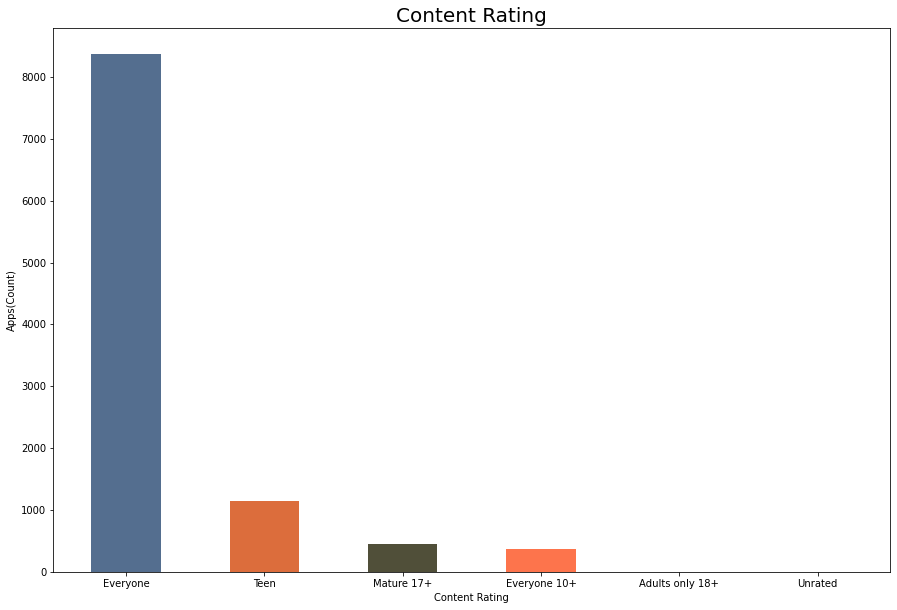

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(abc_list,xyz_list,width=0.5,color=['#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

**Inferences**: Content rating vs no of apps:


1.   Mostly 90% of total apps are targetting audience in every age group and hence open for everyone.
2.   Very few(less then 500 apps) are catering to only adult population i.e Mature 17+



##**No of installs in each category:**

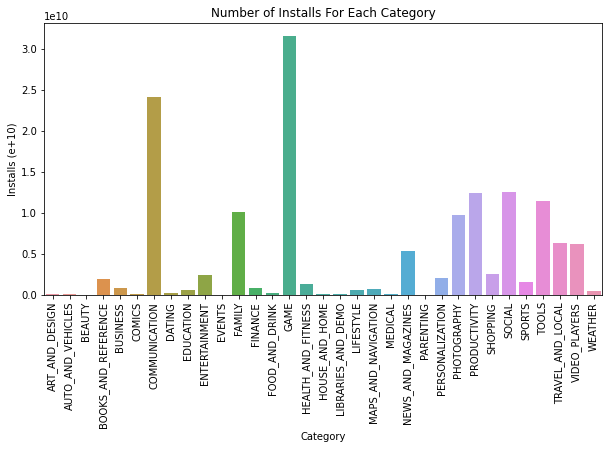

In [ ]:
#No of installs in each category:
categories=final_df_data.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
# to convert groupby object into dataframe
category_installs_sum_df = category_installs_sum_df.reset_index()  

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

#**Inferences**:

1.  From the above barplot, we can see that most of the downloaded apps are from the categories of 'Game' and 'Communication'.Earlier, we also saw that the price of gaming apps is the least among all the categories.This can be meaningfully attributed towards the 'new wave' of gaming as a career choice. Owing to this transition, companies are more eager to launch product/apps in the gaming category. This can be confirmed with the information that gaming category has one of the highest no of apps on playstore.
2.   We can highlight that the business category has very few installs despite listing one of the highest no of apps on playstore.



##**Application type distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


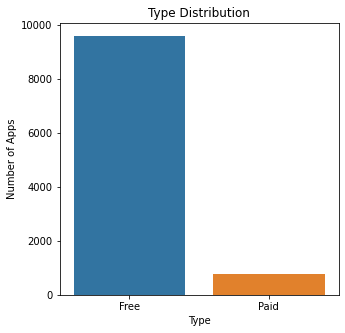

In [ ]:
# application type distribution
plt.figure(figsize=(5, 5))
sns.countplot(final_df_data['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

#**Inferences:**

1.   From this distribution, we can see that over 9000 apps are freely available while close to 1000 apps are in the paid category.
2.   Considering the other information, we can even see a **'drastic dip'** in the no of installs of free apps vs paid apps.

##**How does the size of an app affect the ratings and number of installs?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.02, 'Rating vs Size of Apps')

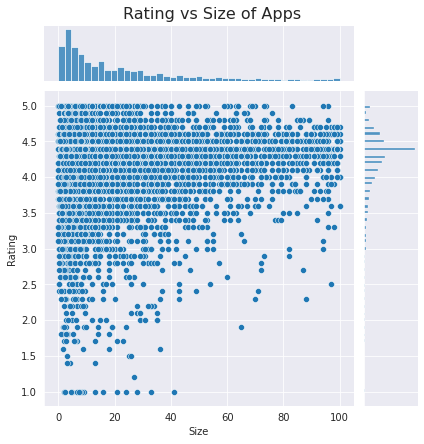

In [ ]:
sns.set_style("darkgrid")
jointplot = sns.jointplot(final_df_data['Size'], final_df_data['Rating'])
jointplot.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=16 )

##**Inferences:**


1.   People generally prefer apps with less size due to data and/ size  constraints. This can be confirmed with the above jointplot. As the size of an app increases, it's rating decreases. 
2.   Surprisingly, there are few apps whose size is close to 100 MBs but has 4/5 stars as a review. Though this number is less, we can't ignore a fact that the rating also depends upon the content that the app is serving.



##**App price trends across various categories**

Text(0.5, 1.0, 'App pricing trend across categories')

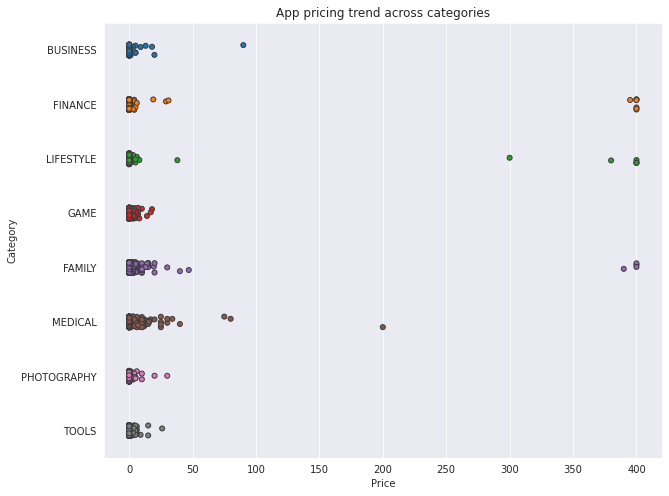

In [ ]:
#App price trends across various categories 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

# Select a few popular app categories
popular_app_cats = final_df_data[final_df_data.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
# apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
# apps_above_200

##**Rating vs Size of Apps**

Text(0.5, 1.02, 'Rating vs Size of Apps')

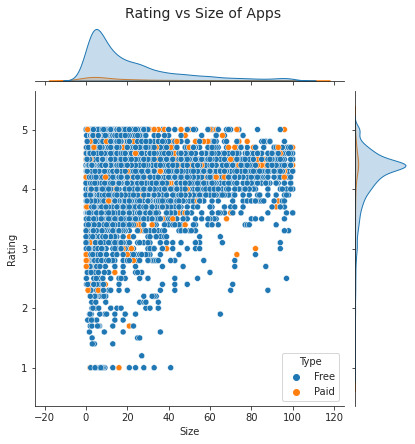

In [ ]:
sns.set_style("ticks")

ax = sns.jointplot(data=final_df_data, x= "Size", y = "Rating" , hue="Type")
ax.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=14 )

**Inferences:**

We can observe that there are very few apps with large size, are paid and also high rating. So we can conclude that people are looking for apps which are free as well as less in size.
One interesting oberservation is that even though few apps are large in size, they have good ratings. The plausible reason could be the price which is zero.

Also, some of the paid apps has less ratings. So price and ratings are poorly correlated.

##**Pair Plot**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Price')

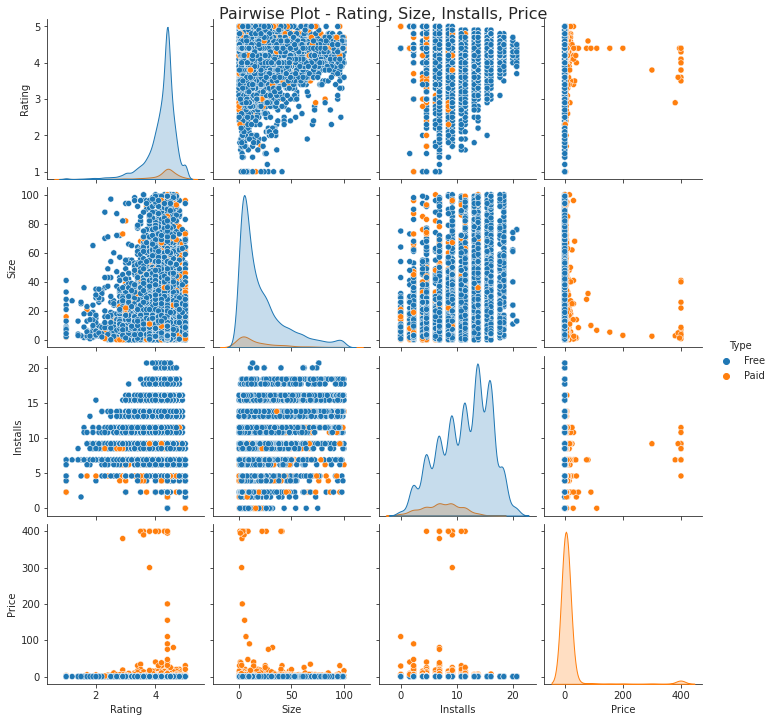

In [ ]:
Rating = final_df_data['Rating']
Size = final_df_data['Size']
Installs = final_df_data['Installs']
Type = final_df_data['Type']
Price = final_df_data['Price']

df_pairplot = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Price','Type']), hue='Type')
df_pairplot.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Price",x=0.5, y=1.0, fontsize=16)

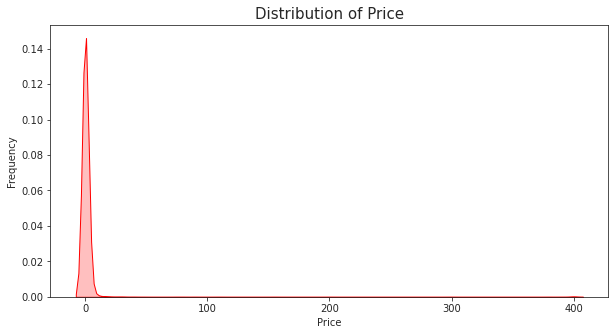

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("Price")
plt.ylabel("Frequency")
graph = sns.kdeplot(final_df_data.Price, color="Red", shade = True)
plt.title('Distribution of Price',size = 15);

Text(0.5, 1.0, 'Installs per Rating')

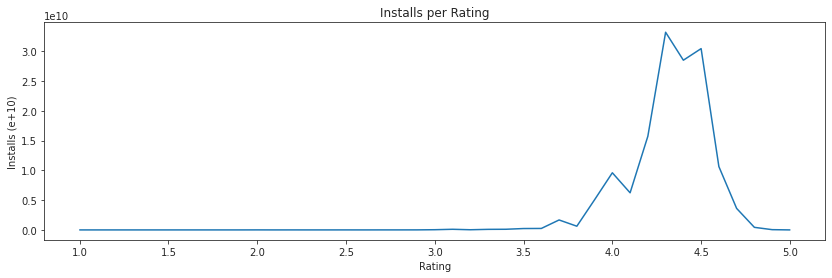

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df_rats=final_df_data.groupby('Rating').sum().reset_index()
fig, plot	= plt.subplots(figsize=(14,4))
plt.plot(df_rats['Rating'],df_rats['Installs'])
plot.set_xlabel('Rating')
plot.set_ylabel('Installs (e+10)')
plot.set_title('Installs per Rating')

In [ ]:
print('The maximum price of an app is' ,final_df_data['Price'].max())

The maximum price of an app is 400.0


In [ ]:
print('The app which has maximum price is',final_df_data.loc[final_df_data['Price'].max(),'App'])
# df_data.loc[df_data['Price'].min(),'App']
# df_data.loc[df_data['Price'].min(),'Category']
# df_data.groupby('Category').agg({'Price':'max'})

The app which has maximum price is Text SMS


##**Plot a histogram from the Rating column**

Average Rating 4.21788130678523


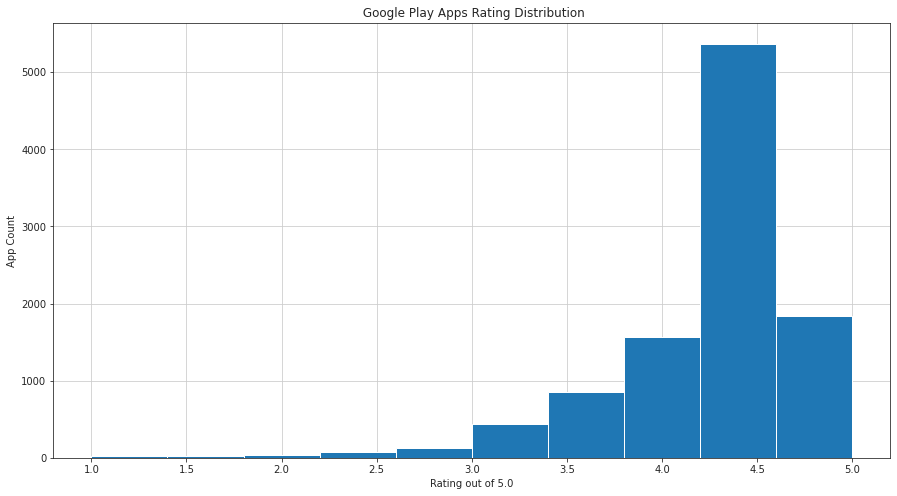

In [ ]:
#Plot a histogram from the Rating column
plt.figure(figsize=(15,8))
print(f"Average Rating {final_df_data['Rating'].mean()}")

final_df_data["Rating"].hist()
plt.title(" Google Play Apps Rating Distribution")
plt.ylabel("App Count")
plt.xlabel("Rating out of 5.0")
plt.show()

From our observation, we found that the average volume of ratings across all app categories is 4.217.In the histogram plot majority of the apps are highly rated with only a few exceptions in the low-rated apps.

##**Heat map for play_store**

Text(0.5, 1.0, 'Correlation Heatmap for Playstore Data')

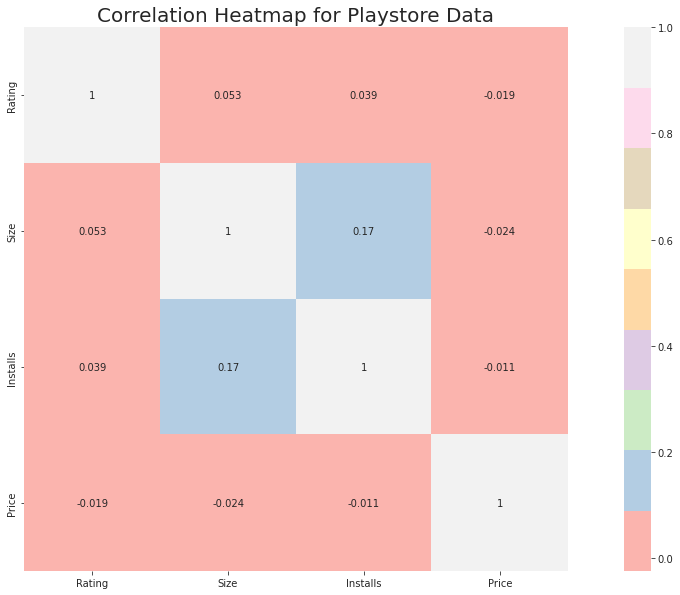

In [ ]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(final_df_data.corr(), annot= True,cmap=sns.color_palette('Pastel1'),square=True)
plt.title('Correlation Heatmap for Playstore Data', size=20)

 1. There is a positive correlation between the Reviews and Installs column i.e (0.63). Higher the number of review,higher the total number of downloads.
which means customer downloads a given app more if it is reviewed by large no.of people.

2. The Price is slightly negatively correlated with the Rating, Reviews, and  
Installs. 
Which means if the price of app increases, the average rating, total number of reviews and Installs fall down.

3. The Rating is slightly positive correlated with the Installs and Reviews column.
This shows that if the Rating of an app increases then it will also increase the downloads and reviews of a given app.

4. Hence we can conclude that increasing the review and Rating count in the app may increase the market share.

5. To capture the market more rapidley The launch price of an app should be less at the starting and then can be increased with time.

**Top category in the google play store**

In [ ]:
x = df_data['Category'].value_counts().index
y = df_data['Category'].value_counts()
x_axis = []
y_axis = []
for i in range(len(x)):
    x_axis.append(x[i])
    y_axis.append(y[i])


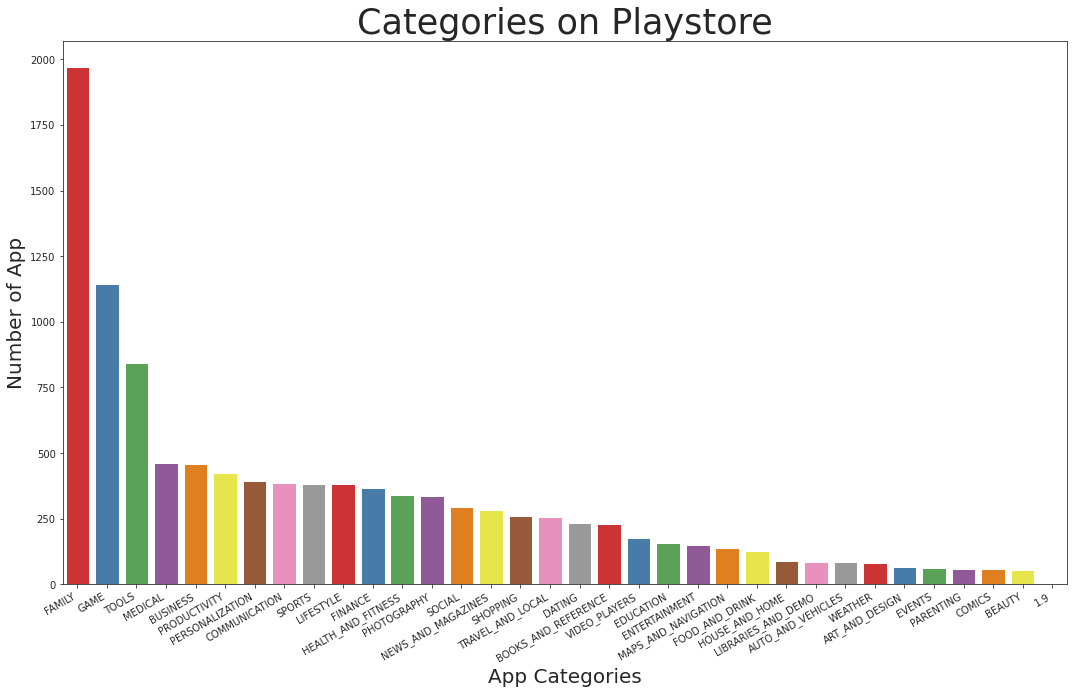

In [ ]:
plt.figure(figsize=(18,10))
plt.xlabel('App Categories', size=20)
plt.ylabel('Number of App', size=20)
graph = sns.barplot(x = x_axis, y = y_axis,palette = "Set1")
graph.set_title("Categories on Playstore", fontsize = 35)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30, horizontalalignment='right');

###From the above Bar Chart's output we can say that most of the apps in the play store come under **FAMILY & GAME** category and least are of **EVENTS & BEAUTY** Category.
###It means majority of apps are from either **FAMILY or GAME** category

##**Rating Frequency and Price Frequency**

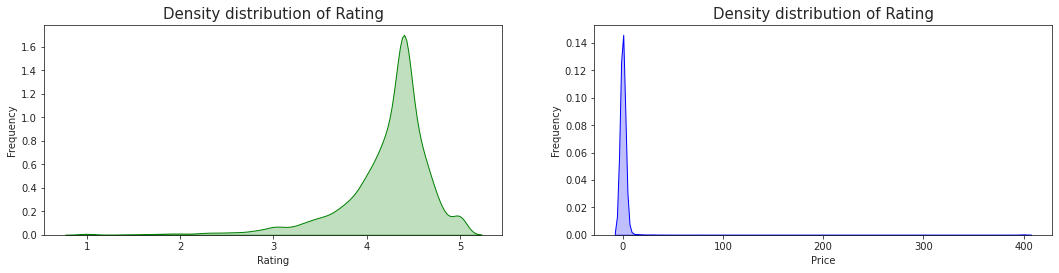

In [ ]:
plt.figure(figsize=(20,10))
#First plot(Rating vs Frequency)

plt.subplot(2,2,1)
plt.xlabel("Rating")
plt.ylabel("Frequency")
sns.kdeplot(final_df_data["Rating"], color="Green", shade = True)
plt.title('Density distribution of Rating',size = 15)

#Second plot(Price vs Frequency)

plt.subplot(2,2,2)
plt.xlabel("Price")
plt.ylabel("Frequency")
sns.kdeplot(final_df_data["Price"], color="Blue", shade = True)
plt.title('Density distribution of Rating',size = 15)

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

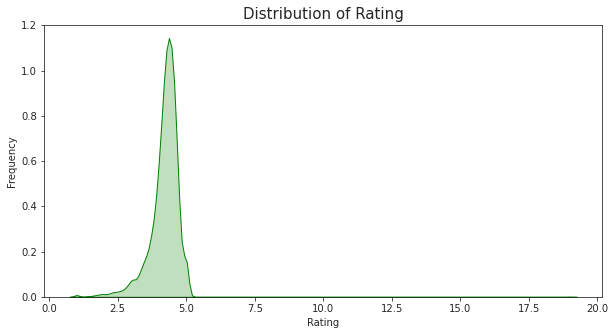

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df_data.Rating, color="Green", shade = True)
plt.title('Distribution of Rating',size = 15);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


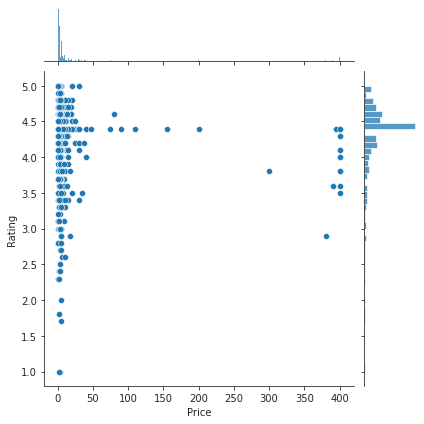

In [ ]:
paid_apps = final_df_data[final_df_data.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

**There are 4 features which gives the information about user engagement with the andriod apps in the play store.**
* Here there is data about the translated reviews given by the users, Sentiment polarity, Sentiment subjectivity and Sentiment for a given app.

* Polarity is float which lies in the range of [-1,1] where value is near to 1 means positive statement and values near to -1 means a negative statement.

* Subjectivity is a float value within the range [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. Subjective sentence expresses some personal feelings, views, beliefs, opinions, allegations, desires, beliefs, suspicions, and speculations where as Objective sentences are factual.

* For example, if subjectivity value is near to 1 means its a public opinion and if its near to 0 means its a factual data.

* Sentiment finally gives whether it is positive, negative or neutral statement/reviews for a given app.

##**Correlation between Sentiment_Polarity and Sentiment_Subjectivity.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


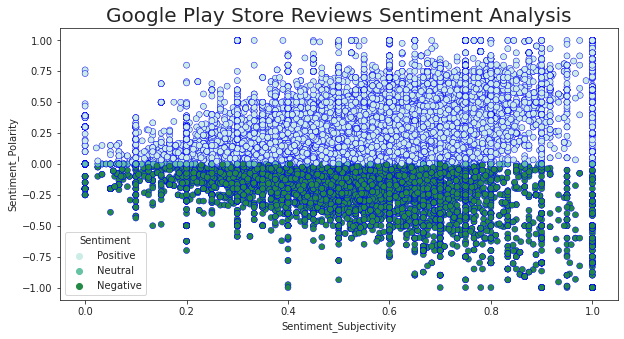

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(df_reviews['Sentiment_Subjectivity'], df_reviews['Sentiment_Polarity'],
                hue = df_reviews['Sentiment'], edgecolor='blue', palette="BuGn")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()


* As we can observe from above graph that sentiment subjectivity is mostely lie in the range of **0.5 to 0.8**. which means people are giving reviews more **openion and experience based** rather than **factual.**
* Sentiment subjectivity is mostly scattered around -0.5 to 0.75 this shows that polarity is not always proportional to sentiment subjectivity but in maximum number of cases **it shows a proportional behavior**.

#**Conclusions:**


* Reviews and installs share positive correlation while price and rating share
negative correlation.
* Art and design have the most number of installs.
* Developing apps within Family and Lifestyle categories can be aimed for more profit i.e high revenue .
* 61% of people have positive sentiments while approx 15% reacted negatively which is quite low in comparison(Rest are Neutral).
* Compared with Free and paid apps, 92.12% apps are Free and 7.81% apps are paid.
* As Everyone content rating contains all age group people , it has maximum i.e 81.80%  apps.
* Maximum number of apps belong to the Family , Game and Tools category.
* The category Game is a potential unsaturated space for all developers, as it has a maximum number of installs.
* People love to download apps from Tools , Entertainment , Education , Business and medical genres.
* Average rating of apps on the play store is 4.17 which is quite good.
Users prefer to pay for apps that are light weighted.
* Paid apps that are higher in size may not perform well in the market.
Users tend to download a given app more if it has been reviewed by a large number of people.
* People tend to review harsher reviews for paid apps.
* There is a positive correlation between installs and rating. 
* To develop an app which results with high rating needs to get updated with the latest version keeping it optimally sized.
* It’s good to develop a free app and have a content rating for everyone.
